In [ ]:
from openpyxl import load_workbook
# teaching points
# what's the difference between import xxxx, vs from xxxx import xxxx
# we can import xxxx, or import *

In [ ]:
import time
# teaching points
# what is time library, how to use it, e.g. time.time
# how does time library result in very large numbers (as it start counting from mid 1900s)

In [ ]:
path = str(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott')
wb = load_workbook(path + '\\' + str('May.xlsx'), data_only = True)
# teaching point
# how to use combined string to effectively retrieve files from the same path
# use # to comment, markdown

In [ ]:
wb.sheetnames
# teaching points
# what is dot for after functions
# again how to use shift tab to read doc

#### Pandas cheat sheet https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

<img src="https://i.pinimg.com/originals/3a/a2/87/3aa28716938d1b5b164b7f3be1f8e1d4.gif">

Pandas is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like .csv, .tsv, or .xlsx. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with Matplotlib and Seaborn, Pandas provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in Pandas are implemented with Series and DataFrame classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of Series instances. DataFrames are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

#### Example 1: Import / Export files (10 min)

In [1]:
import openpyxl
from openpyxl import load_workbook
import pandas as pd
import time

In [2]:
# to be discussed towards the end of this example
start_time = time.time()

In [3]:
path = str(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott')
wb = load_workbook(path + '\\' + str('May.xlsx'), data_only = True)
wb

In [4]:
wb.sheetnames

['Sheet1', 'Sheet2']

In [5]:
details = wb['Sheet1'] # retrieving items from list
details = pd.DataFrame(details.values)
details

,0,1,2,3,4
0,Resource Name,Date,Task,Quantity,Description
1,"Ibrahim, Haitham Mohamed",2021-05-17 00:00:00,7.2.1,1.234,None
2,"Ibrahim, Haitham Mohamed",2021-05-18 00:00:00,7.2.1,5.678,None
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1.348,None
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3.1415,None
...,...,...,...,...,...
772,"Mohan, Rahini",2021-05-13 00:00:00,2.31.9,8,updating markups
773,"Patil, Basavaraj",2021-05-18 00:00:00,2.31.9,4,None
774,"Patil, Basavaraj",2021-05-19 00:00:00,2.31.9,4,None
775,"Patil, Basavaraj",2021-05-20 00:00:00,2.31.9,4,None


In [6]:
details = wb['Sheet2']
details = pd.DataFrame(details.values)
details

,0
0,I am a random sheet


In [7]:
for i in wb.sheetnames:
    details = wb[i]
    details = pd.DataFrame(details.values)
    print(details)

                            0                    1       2         3  \
0               Resource Name                 Date    Task  Quantity   
1    Ibrahim, Haitham Mohamed  2021-05-17 00:00:00   7.2.1     1.234   
2    Ibrahim, Haitham Mohamed  2021-05-18 00:00:00   7.2.1     5.678   
3    Ibrahim, Haitham Mohamed  2021-05-19 00:00:00   7.2.1     1.348   
4    Ibrahim, Haitham Mohamed  2021-05-20 00:00:00   7.2.1    3.1415   
..                        ...                  ...     ...       ...   
772             Mohan, Rahini  2021-05-13 00:00:00  2.31.9         8   
773          Patil, Basavaraj  2021-05-18 00:00:00  2.31.9         4   
774          Patil, Basavaraj  2021-05-19 00:00:00  2.31.9         4   
775          Patil, Basavaraj  2021-05-20 00:00:00  2.31.9         4   
776          Patil, Basavaraj  2021-05-21 00:00:00  2.31.9         4   

                    4  
0         Description  
1                None  
2                None  
3                None  
4              

In [8]:
from pandas import ExcelWriter
writer = ExcelWriter(path + str('\\') + 'final.xlsx')
details.to_excel(writer, index=False)
writer.save()

In [9]:
wb = load_workbook(path + '\\' + str('final.xlsx'), data_only = True)
wb['Sheet1'].column_dimensions['A'].width = 26
wb['Sheet1'].column_dimensions['B'].width = 11
wb.save(path + '\\' + str('final.xlsx'))

In [10]:
print('Time taken: ' + str(time.time()-start_time) + str('s.'))

Time taken: 0.3540689945220947s.


In [11]:
# teaching points
# details was re-declared under sheet2, jupyter can run cells in any order, variable only picks the most recent one
# why sheet1 export contains unwanted column heads? pandas assign column head automatically when read
# need to process before writing (next example)
# modify column width for aesthetic purpose
# time the process, read and write in less than 0.5s!

In [1]:
# accessing multiple files
import glob
many_files = glob.glob(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott\*.xlsx')

for each_file in many_files:
    print(each_file)

C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott\22-MM Timesheets - Jan- 21.xlsx
C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott\23-MM Timesheets - Feb- 21.xlsx
C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott\24-MM Timesheets - Mar- 21.xlsx
C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott\25-MM Timesheets - Apr- 21_In Progress.xlsx
C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott\May.xlsx


In [ ]:
# change a certain cell
wb = load_workbook(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\final.xlsx', data_only = True)
new_title = input()
ws = wb.active
ws['A1'] = new_title

wb.save(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\final.xlsx')

#### Example 2: Understanding your data (15 min)

In [12]:
path = str(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott')
wb = load_workbook(path + '\\' + str('May.xlsx'), data_only = True)

details = wb['Sheet1']
details = pd.DataFrame(details.values)
details

,0,1,2,3,4
0,Resource Name,Date,Task,Quantity,Description
1,"Ibrahim, Haitham Mohamed",2021-05-17 00:00:00,7.2.1,1.234,None
2,"Ibrahim, Haitham Mohamed",2021-05-18 00:00:00,7.2.1,5.678,None
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1.348,None
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3.1415,None
...,...,...,...,...,...
772,"Mohan, Rahini",2021-05-13 00:00:00,2.31.9,8,updating markups
773,"Patil, Basavaraj",2021-05-18 00:00:00,2.31.9,4,None
774,"Patil, Basavaraj",2021-05-19 00:00:00,2.31.9,4,None
775,"Patil, Basavaraj",2021-05-20 00:00:00,2.31.9,4,None


In [13]:
details.head()

,0,1,2,3,4
0,Resource Name,Date,Task,Quantity,Description
1,"Ibrahim, Haitham Mohamed",2021-05-17 00:00:00,7.2.1,1.234,None
2,"Ibrahim, Haitham Mohamed",2021-05-18 00:00:00,7.2.1,5.678,None
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1.348,None
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3.1415,None


In [14]:
details.columns = details.iloc[0]
details = details[1:]
details = details.iloc[2:15,:4]
details

# got text, date, numbers to be used for illustration purpose

,Resource Name,Date,Task,Quantity
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1.348
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3.1415
5,"Garnero, Adrian",2021-05-17 00:00:00,7.2.1,8
6,"Garnero, Adrian",2021-05-18 00:00:00,7.2.1,8
7,"Tong, Ronald",2021-05-17 00:00:00,7.2.1,8
8,"Tong, Ronald",2021-05-21 00:00:00,7.2.1,8
9,"Garnero, Adrian",2021-05-12 00:00:00,7.2.1,2
10,"Garnero, Adrian",2021-05-14 00:00:00,7.2.1,2
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,8
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,8


In [15]:
print(details.shape) # remember row by column

(13, 4)


In [16]:
details.tail()

,Resource Name,Date,Task,Quantity
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,8
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,8
13,"Ibrahim, Haitham Mohamed",2021-05-03 00:00:00,7.2.1,1
14,"Ibrahim, Haitham Mohamed",2021-05-04 00:00:00,7.2.1,2
15,"Ibrahim, Haitham Mohamed",2021-05-05 00:00:00,7.2.1,2


In [17]:
details.columns

Index(['Resource Name', 'Date', 'Task', 'Quantity'], dtype='object', name=0)

In [18]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 3 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Resource Name  13 non-null     object
 1   Date           13 non-null     object
 2   Task           13 non-null     object
 3   Quantity       13 non-null     object
dtypes: object(4)
memory usage: 548.0+ bytes


In [19]:
details['Quantity'] = details['Quantity'].astype('int64') # change column type
details

,Resource Name,Date,Task,Quantity
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3
5,"Garnero, Adrian",2021-05-17 00:00:00,7.2.1,8
6,"Garnero, Adrian",2021-05-18 00:00:00,7.2.1,8
7,"Tong, Ronald",2021-05-17 00:00:00,7.2.1,8
8,"Tong, Ronald",2021-05-21 00:00:00,7.2.1,8
9,"Garnero, Adrian",2021-05-12 00:00:00,7.2.1,2
10,"Garnero, Adrian",2021-05-14 00:00:00,7.2.1,2
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,8
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,8


In [20]:
details.describe()

,Quantity
count,13.000000
mean,4.692308
std,3.224506
min,1.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,8.000000


In [21]:
details['Resource Name'].value_counts(ascending=True)

Garnero, Adrian             4
Tong, Ronald                4
Ibrahim, Haitham Mohamed    5
Name: Resource Name, dtype: int64

In [22]:
details.sort_values(by='Resource Name', ascending=True).tail()

,Resource Name,Date,Task,Quantity
15,"Ibrahim, Haitham Mohamed",2021-05-05 00:00:00,7.2.1,2
7,"Tong, Ronald",2021-05-17 00:00:00,7.2.1,8
8,"Tong, Ronald",2021-05-21 00:00:00,7.2.1,8
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,8
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,8


In [23]:
details['Quantity'].mean()

4.6923076923076925

In [24]:
details[details['Resource Name'] == 'Ibrahim, Haitham Mohamed'].max() # mean, min

0
Resource Name    Ibrahim, Haitham Mohamed
Date                  2021-05-20 00:00:00
Task                                7.2.1
Quantity                                3
dtype: object

In [25]:
details[details['Resource Name'].str.contains('Haitham')]['Quantity'].unique()

array([1, 3, 2], dtype=int64)

In [26]:
details[-6:]

,Resource Name,Date,Task,Quantity
10,"Garnero, Adrian",2021-05-14 00:00:00,7.2.1,2
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,8
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,8
13,"Ibrahim, Haitham Mohamed",2021-05-03 00:00:00,7.2.1,1
14,"Ibrahim, Haitham Mohamed",2021-05-04 00:00:00,7.2.1,2
15,"Ibrahim, Haitham Mohamed",2021-05-05 00:00:00,7.2.1,2


In [27]:
details['Quantity']

3     1
4     3
5     8
6     8
7     8
8     8
9     2
10    2
11    8
12    8
13    1
14    2
15    2
Name: Quantity, dtype: int64

In [28]:
details['Quantity x2'] = details['Quantity']*2
details

,Resource Name,Date,Task,Quantity,Quantity x2
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1,2
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3,6
5,"Garnero, Adrian",2021-05-17 00:00:00,7.2.1,8,16
6,"Garnero, Adrian",2021-05-18 00:00:00,7.2.1,8,16
7,"Tong, Ronald",2021-05-17 00:00:00,7.2.1,8,16
8,"Tong, Ronald",2021-05-21 00:00:00,7.2.1,8,16
9,"Garnero, Adrian",2021-05-12 00:00:00,7.2.1,2,4
10,"Garnero, Adrian",2021-05-14 00:00:00,7.2.1,2,4
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,8,16
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,8,16


In [29]:
details.drop(['Quantity'], axis=1,# inplace=True
            )

,Resource Name,Date,Task,Quantity x2
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,2
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,6
5,"Garnero, Adrian",2021-05-17 00:00:00,7.2.1,16
6,"Garnero, Adrian",2021-05-18 00:00:00,7.2.1,16
7,"Tong, Ronald",2021-05-17 00:00:00,7.2.1,16
8,"Tong, Ronald",2021-05-21 00:00:00,7.2.1,16
9,"Garnero, Adrian",2021-05-12 00:00:00,7.2.1,4
10,"Garnero, Adrian",2021-05-14 00:00:00,7.2.1,4
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,16
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,16


In [30]:
details # not dropped if not inplace=True above

,Resource Name,Date,Task,Quantity,Quantity x2
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1,2
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3,6
5,"Garnero, Adrian",2021-05-17 00:00:00,7.2.1,8,16
6,"Garnero, Adrian",2021-05-18 00:00:00,7.2.1,8,16
7,"Tong, Ronald",2021-05-17 00:00:00,7.2.1,8,16
8,"Tong, Ronald",2021-05-21 00:00:00,7.2.1,8,16
9,"Garnero, Adrian",2021-05-12 00:00:00,7.2.1,2,4
10,"Garnero, Adrian",2021-05-14 00:00:00,7.2.1,2,4
11,"Tong, Ronald",2021-05-10 00:00:00,7.2.1,8,16
12,"Tong, Ronald",2021-05-14 00:00:00,7.2.1,8,16


#### Example 3: Manipulate data (20 min)

In [49]:
path_mott = str(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Mott')
wb = load_workbook(path_mott + '\\' + str('May.xlsx'), data_only = True)

mott = wb['Sheet1']
mott = pd.DataFrame(mott.values)
mott.columns = mott.iloc[0]
mott = mott[1:]

#####

path_arcadis = str(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\Arcadis')
wb = load_workbook(path_arcadis + '\\' + str('May.xlsx'), data_only = True)

arcadis = wb['Sheet1']
arcadis = pd.DataFrame(arcadis.values)
arcadis.columns = arcadis.iloc[0]
arcadis = arcadis[1:]

In [50]:
mott

,Resource Name,Date,Task,Quantity,Description
1,"Ibrahim, Haitham Mohamed",2021-05-17 00:00:00,7.2.1,1.234,None
2,"Ibrahim, Haitham Mohamed",2021-05-18 00:00:00,7.2.1,5.678,None
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1.348,None
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3.1415,None
5,"Garnero, Adrian",2021-05-17 00:00:00,7.2.1,8,None
...,...,...,...,...,...
772,"Mohan, Rahini",2021-05-13 00:00:00,2.31.9,8,updating markups
773,"Patil, Basavaraj",2021-05-18 00:00:00,2.31.9,4,None
774,"Patil, Basavaraj",2021-05-19 00:00:00,2.31.9,4,None
775,"Patil, Basavaraj",2021-05-20 00:00:00,2.31.9,4,None


In [51]:
arcadis

,Trans Id,Employee/Supplier Number,Project,Task,Expnd Type,Item Date,Employee/Supplier,Quantity,UOM,Comment,From,To
1,18619959,13417,10029089,1.16.17.31,Regular Hours,2021-05-03 00:00:00,"Abalos, Ramil Virgil",1,Hours,None,None,None
2,18620127,13417,10029089,1.16.28.3,Regular Hours,2021-05-04 00:00:00,"Abalos, Ramil Virgil",1,Hours,None,None,None
3,18621979,13417,10029089,1.16.17.31,Regular Hours,2021-05-06 00:00:00,"Abalos, Ramil Virgil",1,Hours,None,None,None
4,18623006,13417,10029089,1.16.17.31,Regular Hours,2021-05-07 00:00:00,"Abalos, Ramil Virgil",1,Hours,None,None,None
5,18619305,13417,10029089,1.16.28.3,Regular Hours,2021-05-07 00:00:00,"Abalos, Ramil Virgil",1,Hours,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
3333,None,None,None,None,None,None,None,None,None,None,None,None
3334,None,None,None,None,None,None,None,None,None,None,None,None
3335,None,None,None,None,None,None,None,None,None,None,None,None
3336,None,None,None,None,None,None,None,None,None,None,None,None


In [52]:
path_mott = str(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing')
wb = load_workbook(path_mott + '\\' + str('Timesheet Codes - for circulation.xlsx'), data_only = True)

code_list = wb['Sheet1']
code_list = pd.DataFrame(code_list.values)
code_list.columns = code_list.iloc[0]
code_list = code_list[1:]
code_list

,Task,MM Codes,Arcadis Codes,Status
1,1.1.,406377PM,1.1,Open
2,1.1.3.,406377PM03,1.1.3,Open
3,1.1.6.,406377PM06,1.1.6,Closed
4,1.1.7.,406377PM07,1.1.7,Open
5,1.2.,406377DM,1.2,Closed
...,...,...,...,...
497,2.31.18,406377EW18,1.16.28.18,Open
498,2.31.19,406377EW19,1.16.28.19,Open
499,2.31.20,406377EW20,1.16.28.20,Open
500,2.31.21,406377EW21,1.16.28.21,Open


In [54]:
mott['Resource'] = mott['Resource Name']
mott.drop(['Resource Name','Description'], axis=1, inplace=True)
mott

,Date,Task,Quantity,Resource
1,2021-05-17 00:00:00,7.2.1,1.234,"Ibrahim, Haitham Mohamed"
2,2021-05-18 00:00:00,7.2.1,5.678,"Ibrahim, Haitham Mohamed"
3,2021-05-19 00:00:00,7.2.1,1.348,"Ibrahim, Haitham Mohamed"
4,2021-05-20 00:00:00,7.2.1,3.1415,"Ibrahim, Haitham Mohamed"
5,2021-05-17 00:00:00,7.2.1,8,"Garnero, Adrian"
...,...,...,...,...
772,2021-05-13 00:00:00,2.31.9,8,"Mohan, Rahini"
773,2021-05-18 00:00:00,2.31.9,4,"Patil, Basavaraj"
774,2021-05-19 00:00:00,2.31.9,4,"Patil, Basavaraj"
775,2021-05-20 00:00:00,2.31.9,4,"Patil, Basavaraj"


In [56]:
arcadis['Resource'] = arcadis['Employee/Supplier']
arcadis['Date'] = arcadis['Item Date']
arcadis['Arcadis Codes'] = arcadis['Task']
arcadis.drop(['Trans Id','Employee/Supplier Number','Project','Task','Expnd Type','Item Date','Employee/Supplier','UOM','Comment','From','To'], axis=1, inplace=True)
arcadis

,Quantity,Resource,Date,Arcadis Codes
1,1,"Abalos, Ramil Virgil",2021-05-03 00:00:00,1.16.17.31
2,1,"Abalos, Ramil Virgil",2021-05-04 00:00:00,1.16.28.3
3,1,"Abalos, Ramil Virgil",2021-05-06 00:00:00,1.16.17.31
4,1,"Abalos, Ramil Virgil",2021-05-07 00:00:00,1.16.17.31
5,1,"Abalos, Ramil Virgil",2021-05-07 00:00:00,1.16.28.3
...,...,...,...,...
3333,None,None,None,None
3334,None,None,None,None
3335,None,None,None,None
3336,None,None,None,None


In [60]:
# have a read on https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# about the differences between merge, join, concatenate and compare
# pd.concat([arcadis, code_list], axis=1, join='inner')
arcadis.merge(code_list, on='Arcadis Codes', how='left')

,Quantity,Resource,Date,Arcadis Codes,Task,MM Codes,Status
0,1,"Abalos, Ramil Virgil",2021-05-03 00:00:00,1.16.17.31,2.4.47,406377VC26,Closed
1,1,"Abalos, Ramil Virgil",2021-05-04 00:00:00,1.16.28.3,2.31.3,406377EW03,Open
2,1,"Abalos, Ramil Virgil",2021-05-06 00:00:00,1.16.17.31,2.4.47,406377VC26,Closed
3,1,"Abalos, Ramil Virgil",2021-05-07 00:00:00,1.16.17.31,2.4.47,406377VC26,Closed
4,1,"Abalos, Ramil Virgil",2021-05-07 00:00:00,1.16.28.3,2.31.3,406377EW03,Open
...,...,...,...,...,...,...,...
3332,None,None,None,None,None,None,None
3333,None,None,None,None,None,None,None
3334,None,None,None,None,None,None,None
3335,None,None,None,None,None,None,None


In [64]:
arcadis = arcadis.merge(code_list, on='Arcadis Codes', how='left')
arcadis.drop(['Arcadis Codes','MM Codes','Status'], axis=1, inplace=True)
arcadis

,Quantity,Resource,Date,Task
0,1,"Abalos, Ramil Virgil",2021-05-03 00:00:00,2.4.47
1,1,"Abalos, Ramil Virgil",2021-05-04 00:00:00,2.31.3
2,1,"Abalos, Ramil Virgil",2021-05-06 00:00:00,2.4.47
3,1,"Abalos, Ramil Virgil",2021-05-07 00:00:00,2.4.47
4,1,"Abalos, Ramil Virgil",2021-05-07 00:00:00,2.31.3
...,...,...,...,...
3332,None,None,None,None
3333,None,None,None,None
3334,None,None,None,None
3335,None,None,None,None


In [65]:
timesheet_grand = pd.DataFrame(columns=['Resource', 'Date', 'Task', 'Quantity'])
timesheet_grand

,Resource,Date,Task,Quantity


In [66]:
timesheet_grand = pd.concat([timesheet_grand, mott, arcadis], axis=0)
timesheet_grand

# quick check: rows of two files equals total row of grand

,Resource,Date,Task,Quantity
1,"Ibrahim, Haitham Mohamed",2021-05-17 00:00:00,7.2.1,1.234
2,"Ibrahim, Haitham Mohamed",2021-05-18 00:00:00,7.2.1,5.678
3,"Ibrahim, Haitham Mohamed",2021-05-19 00:00:00,7.2.1,1.348
4,"Ibrahim, Haitham Mohamed",2021-05-20 00:00:00,7.2.1,3.1415
5,"Garnero, Adrian",2021-05-17 00:00:00,7.2.1,8
...,...,...,...,...
3332,None,None,None,None
3333,None,None,None,None
3334,None,None,None,None
3335,None,None,None,None


In [67]:
timesheet_grand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4113 entries, 1 to 3336
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resource  2111 non-null   object
 1   Date      2111 non-null   object
 2   Task      2099 non-null   object
 3   Quantity  2111 non-null   object
dtypes: object(4)
memory usage: 160.7+ KB


In [68]:
timesheet_grand['Date'] = pd.to_datetime(timesheet_grand.Date)
timesheet_grand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4113 entries, 1 to 3336
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Resource  2111 non-null   object        
 1   Date      2111 non-null   datetime64[ns]
 2   Task      2099 non-null   object        
 3   Quantity  2111 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 160.7+ KB


In [69]:
timesheet_grand

,Resource,Date,Task,Quantity
1,"Ibrahim, Haitham Mohamed",2021-05-17,7.2.1,1.234
2,"Ibrahim, Haitham Mohamed",2021-05-18,7.2.1,5.678
3,"Ibrahim, Haitham Mohamed",2021-05-19,7.2.1,1.348
4,"Ibrahim, Haitham Mohamed",2021-05-20,7.2.1,3.1415
5,"Garnero, Adrian",2021-05-17,7.2.1,8
...,...,...,...,...
3332,None,NaT,None,None
3333,None,NaT,None,None
3334,None,NaT,None,None
3335,None,NaT,None,None


In [70]:
# N/A due to blank cells inherit from excel
timesheet_grand.dropna(inplace=True)
timesheet_grand['Date'] = timesheet_grand['Date'].dt.strftime('%m/%d/%Y')
timesheet_grand

,Resource,Date,Task,Quantity
1,"Ibrahim, Haitham Mohamed",05/17/2021,7.2.1,1.234
2,"Ibrahim, Haitham Mohamed",05/18/2021,7.2.1,5.678
3,"Ibrahim, Haitham Mohamed",05/19/2021,7.2.1,1.348
4,"Ibrahim, Haitham Mohamed",05/20/2021,7.2.1,3.1415
5,"Garnero, Adrian",05/17/2021,7.2.1,8
...,...,...,...,...
1330,"Zhao, Alice",05/11/2021,2.4.47,7.5
1331,"Zhao, Alice",05/12/2021,2.4.47,0.5
1332,"Zhao, Alice",05/12/2021,2.4.47,7.5
1333,"Zhao, Alice",05/17/2021,1.11.20,2


In [71]:
from pandas import ExcelWriter
writer = ExcelWriter(r'C:\Users\TON93824\Mott MacDonald\Automation & Computational Design - Python\AUS\2021\Session 3 - Excel Manipulation and Data Processing\final.xlsx')
timesheet_grand.to_excel(writer, index=False)
writer.save()

#### Example 4: Other tricks (5 min)

In [78]:
# keywords finding
find_people = timesheet_grand[timesheet_grand['Resource'].str.contains('|'.join(['Paul','Gemma']))]
find_people

,Resource,Date,Task,Quantity
417,"Hopkins, Gemma",05/07/2021,2.31.17,1.5
448,"Hopkins, Gemma",05/03/2021,1.22.9,1
455,"Hopkins, Gemma",05/18/2021,1.1.3,4
462,"Hopkins, Gemma",05/10/2021,1.1.3,2
463,"Hopkins, Gemma",05/11/2021,1.1.3,3
464,"Hopkins, Gemma",05/12/2021,1.1.3,2
475,"Hopkins, Gemma",05/03/2021,1.1.3,4
476,"Hopkins, Gemma",05/04/2021,1.1.3,3
477,"Hopkins, Gemma",05/05/2021,1.1.3,1
478,"Hopkins, Gemma",05/06/2021,1.1.3,1


#### Below is only for illustration purpose
#### More sample plots at https://matplotlib.org/stable/tutorials/introductory/sample_plots.html

In [80]:
find_people = timesheet_grand[timesheet_grand['Resource'].str.contains('|'.join(['Paul','Gemma']))]
find_people['Date'] = pd.to_datetime(find_people.Date)
find_people['Date'].dt.strftime('%Y-%m-%d')
find_people = find_people.sort_values(by='Date')
# find_people

C:\Users\TON93824\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
final_plot_frame = pd.DataFrame()
final_plot_frame['Date'] = pd.date_range(find_people['Date'].min(),find_people['Date'].max(), freq='D')

for i in range(len(find_people['Resource'].unique())):
    filtered_find_people = find_people[find_people['Resource'] == find_people['Resource'].unique()[i]]
    temp = filtered_find_people.groupby(filtered_find_people['Date'], as_index=False).aggregate({'Quantity':'sum'})
    final_plot_frame = final_plot_frame.merge(temp, on='Date', how='left')
    final_plot_frame = final_plot_frame.fillna(0)
    final_plot_frame[find_people['Resource'].unique()[i]] = final_plot_frame['Quantity']
    final_plot_frame.drop(['Quantity'], axis=1, inplace=True)
    final_plot_frame

# final_plot_frame

<IPython.core.display.Javascript object>


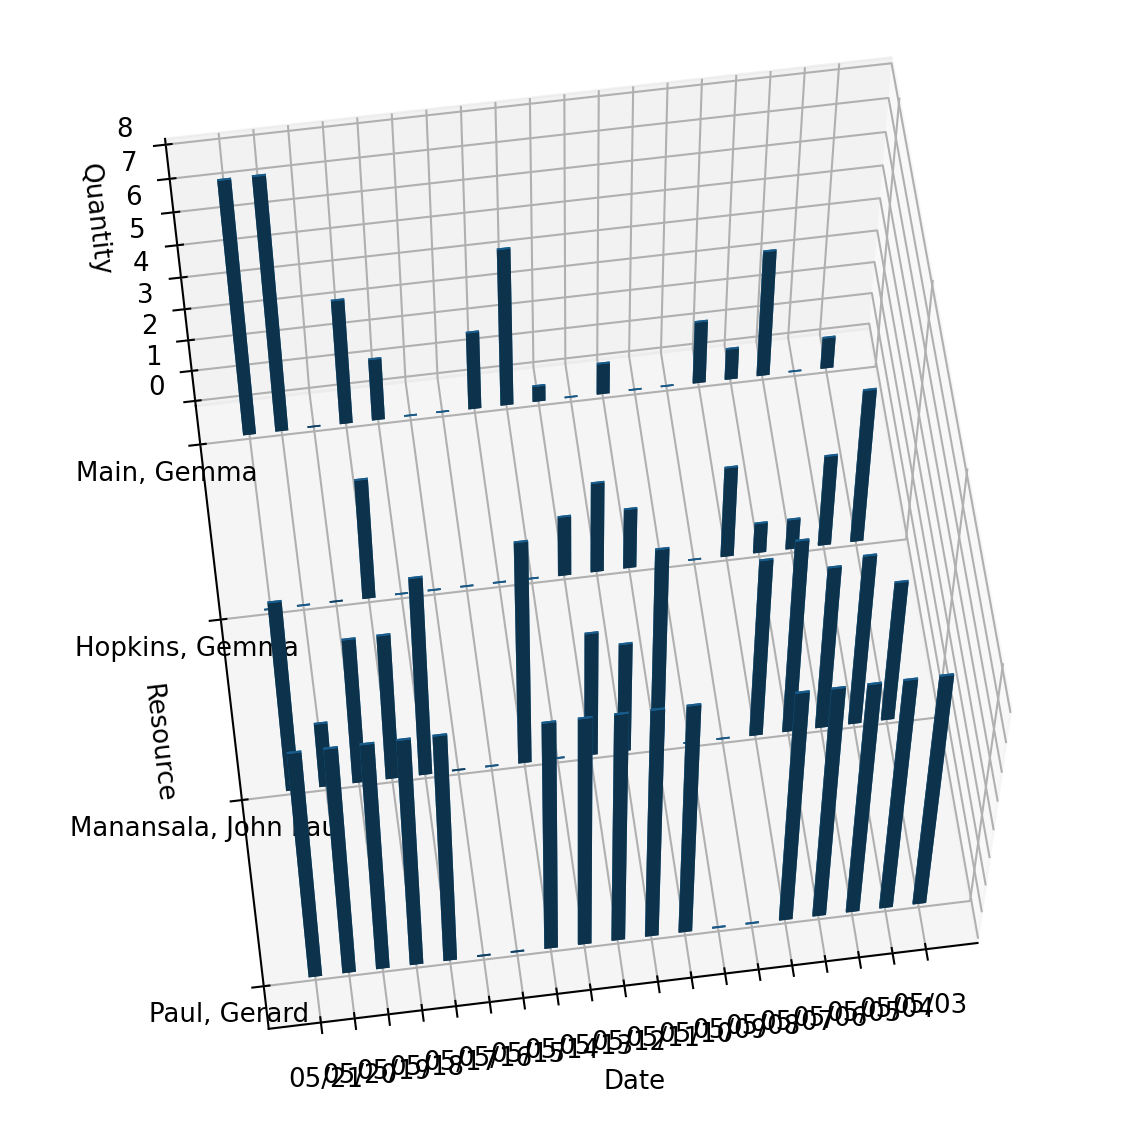

In [91]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as dates
import datetime, random
import matplotlib.ticker as ticker
import numpy as np

# Setting length and wight of the bars
final_plot_frame.drop(['Date'], axis=1, inplace=True)
dx, dy = .4, .01

# prepare 3d axes
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# set bar positions on axes
xpos=np.arange(final_plot_frame.shape[0])
ypos=np.arange(final_plot_frame.shape[1])

# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create X, Y grid 
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# set the start of the bar to 0
zpos=np.zeros(final_plot_frame.shape).flatten()

# the bar heights these are the values under the column A and B
dz = []
for i in range(len(find_people['Resource'].unique())):
    dz.extend(final_plot_frame[find_people['Resource'].unique()[i]].values.tolist())

# ploting the barchart
ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

# Labeling the ticks. For simplicity's sake I used lists for labeling but you can also iterate through columns "Date" and "Shop" to get the label values
name_list = []
for i in range(len(find_people['Resource'].unique())):
    name_list.append(find_people['Resource'].unique()[i])
ax.w_yaxis.set_ticklabels(name_list)
ax.w_xaxis.set_ticklabels(pd.date_range(find_people['Date'].min(),find_people['Date'].max(), freq='D').strftime('%m/%d'))

# Label the axes
ax.set_xlabel("Date")
ax.set_ylabel("Resource")
ax.set_zlabel("Quantity")

plt.show()

### Notes

In [ ]:
lst = [12, 13, 12, 13]
lst2 = [22.123456, 2.8, 2.8, 44]
lst3 = [-22.123456, 3, 44, 32]
df1 = pd.DataFrame(list(zip(lst, lst2, lst3)), columns =['Name', 'val', 'val2'])

lst = [13, 13, 14] 
lst4 = [15, 16, 17]
df2 = pd.DataFrame(list(zip(lst, lst4)), columns =['Name1', 'val1'])

# pd.merge(df1, df2, on=['Name'], how='left')[['val_x', 'val_y']]#.plot()
# pd.concat([df1, df2], axis=1)
# df1.append(df2.iloc[:], ignore_index=True)
df1